This is an exercise based off of: https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/04_Pandas.ipynb

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Set seed for reproducibility
np.random.seed(seed=1234)

In [3]:
# Read from csv into dataframe
url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/titanic.csv"
df = pd.read_csv(url, header=0)

In [4]:
# First five items
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


These are the features:  

pclass: class of travel  
name: full name of passenger  
sex: sex of passenger  
age: age of passenger  
sibsp: # of siblings/spouse  
parch: # of parents/children  
ticket: ticket #  
fare: cost of fare  
cabin: room location  
embarked: port that the passenger embarked at (C - Cherbourg, S - Southampton, Q - Queenstown)  
surived: survival metric (0 - died, 1 - survived)  

In [6]:
# EDA
import matplotlib.pyplot as plt

In [7]:
# Describe features
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


/var/folders/82/72_hwq6s7rj5gg_mx1pm5y500000gn/T/ipykernel_21591/988061383.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


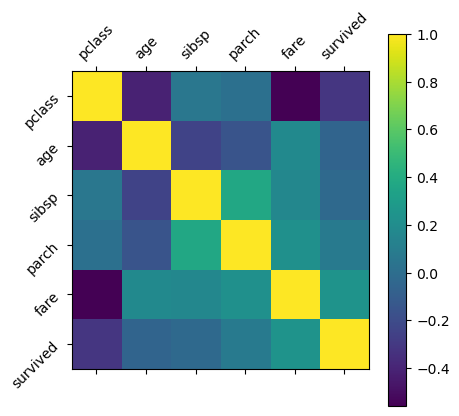

In [11]:
# Correlation Matrix
plt.matshow(df.corr())
continuous_features = df.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation=45)
plt.yticks(range(len(continuous_features)), continuous_features, rotation=45)
plt.colorbar()
plt.show()

<Axes: >

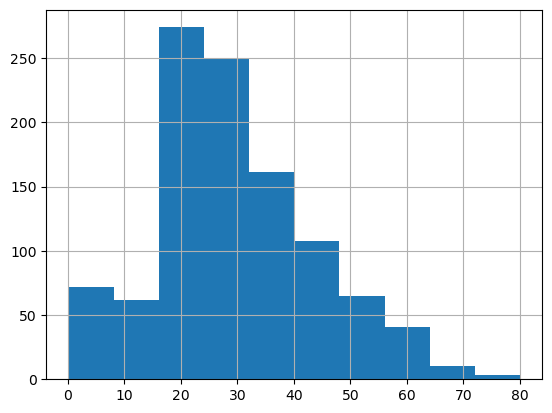

In [13]:
# Histograms
df['age'].hist()

In [15]:
# Unique values
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [16]:
# Filtering
# Selecting data by feature
df['name'].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [17]:
# Filtering
df[df['sex']=='female'].head() # Only the female data appear

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


In [22]:
# Sorting
df.sort_values('age', ascending=False).head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


In [23]:
# Grouping
survived_group = df.groupby('survived')
survived_group.mean()

/var/folders/82/72_hwq6s7rj5gg_mx1pm5y500000gn/T/ipykernel_21591/4041710800.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survived_group.mean()


,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


In [24]:
# Indexing
# Selecting row 0
df.iloc[0, :]

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                  29.0
sibsp                                   0
parch                                   0
ticket                              24160
fare                             211.3375
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

In [27]:
# Selecting specific value
df.iloc[0, 1]

'Allen, Miss. Elisabeth Walton'

In [28]:
# Preprocessing
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [29]:
# Drop rows with NaN values
df.dropna() # removes any row with NaN values
df.reset_index() # resets row indexes incase any were dropped
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [31]:
# Dropping multiple columns
df.drop(['name', 'cabin', 'ticket'], axis=1) # we won't use text features for our intial basic models
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [32]:
# Map features values
df['sex'] = df['sex'].map( {'female': 0, 'male': 1} ).astype(int)
df['embarked'] = df['embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int)
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0.0,1
1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0.0,1
2,1,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,0.0,0
3,1,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,0.0,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,0.0,0


In [33]:
# Feature engineering
# Lambda functions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

In [34]:
df['family_size'] = df[['sibsp', 'parch']].apply(lambda x: get_family_size(x['sibsp'], x['parch']), axis=1)
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,family_size
0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0.0,1,0
1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0.0,1,3
2,1,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,0.0,0,3
3,1,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,0.0,0,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,0.0,0,3


In [35]:
# Reorganizing headers
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'fare', 'embarked', 'survived']]
df.head()

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,0,29.0000,0,0,0,211.3375,0.0,1
1,1,1,0.9167,1,2,3,151.5500,0.0,1
2,1,0,2.0000,1,2,3,151.5500,0.0,0
3,1,1,30.0000,1,2,3,151.5500,0.0,0
4,1,0,25.0000,1,2,3,151.5500,0.0,0


In [36]:
# Saving to a csv file
df.to_csv('processed_titanic.csv', index=False)

In [37]:
!ls -1

03_pandas.ipynb
04_pandas.ipynb
DataScience1.ipynb
data.csv
myfirstnotebook.ipynb
processed_titanic.csv
titanic.csv
